In [ ]:
!pip install openpyxl
import numpy as np
# prompt: read a xlsx file using pandas
import pandas as pd
data = pd.read_excel('/content/Assignment-1_Data.xlsx')

Missing values per column:
 BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
from difflib import get_close_matches

expected_columns = {
    'itemname': ['itemname', 'item_name', 'product', 'product_name', 'item'],
    'quantity': ['quantity', 'qty', 'number', 'amount_purchased'],
    'price': ['price', 'cost', 'amount', 'unit_price'],
    'date': ['date', 'datetime', 'timestamp', 'order_date', 'purchase_date']
}

def find_best_match(candidates, actual_columns):
    for candidate in candidates:
        match = get_close_matches(candidate, actual_columns, n=1, cutoff=0.6)
        if match:
            return match[0]
    return None

# Normalize actual column names
actual_columns = [col.strip().lower().replace('_', '') for col in data.columns]

# Build mapping: match only those found
column_mapping = {}
for target, synonyms in expected_columns.items():
    normalized_synonyms = [s.lower().replace('_', '') for s in synonyms]
    match = find_best_match(normalized_synonyms, actual_columns)
    if match:
        column_mapping[match] = target  # Map original (normalized) name to expected

# Build final renaming map using original column names
final_renaming = {}
for original_col in data.columns:
    norm_col = original_col.strip().lower().replace('_', '')
    if norm_col in column_mapping:
        final_renaming[original_col] = column_mapping[norm_col]

# Rename only the matched columns
data.rename(columns=final_renaming, inplace=True)

In [ ]:
data.columns

Index(['BillNo', 'itemname', 'quantity', 'date', 'price', 'CustomerID',
       'Country'],
      dtype='object')

In [ ]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.6 MB/s eta 0:00:00


In [ ]:
data = data.dropna(subset=['Itemname'])

In [ ]:
data = data.drop_duplicates()

In [ ]:
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]
data.shape

(514270, 7)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%d.%m.%Y %H:%M')
data['Quantity'] = data['Quantity'].astype(int)

# Optional-Reset index after cleaning
data = data.reset_index(drop=True)

data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
top_products = data['Itemname'].value_counts().head(20)
print("Top 10 most frequently purchased items:\n", top_products)

Top 10 most frequently purchased items:
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2253
JUMBO BAG RED RETROSPOT               2081
REGENCY CAKESTAND 3 TIER              1920
PARTY BUNTING                         1669
LUNCH BAG RED RETROSPOT               1558
ASSORTED COLOUR BIRD ORNAMENT         1452
SET OF 3 CAKE TINS PANTRY DESIGN      1353
PACK OF 72 RETROSPOT CAKE CASES       1310
LUNCH BAG  BLACK SKULL.               1288
NATURAL SLATE HEART CHALKBOARD        1238
JUMBO BAG PINK POLKADOT               1225
HEART OF WICKER SMALL                 1199
JUMBO STORAGE BAG SUKI                1188
JUMBO SHOPPER VINTAGE RED PAISLEY     1171
PAPER CHAIN KIT 50'S CHRISTMAS        1167
LUNCH BAG SPACEBOY DESIGN             1154
LUNCH BAG CARS BLUE                   1144
SPOTTY BUNTING                        1127
JAM MAKING SET PRINTED                1118
WOODEN PICTURE FRAME WHITE FINISH     1098
Name: count, dtype: int64


Top 10 most fretly purchased items:
 Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2253
JUMBO BAG RED RETROSPOT               2081
REGENCY CAKESTAND 3 TIER              1920
PARTY BUNTING                         1669
LUNCH BAG RED RETROSPOT               1558
ASSORTED COLOUR BIRD ORNAMENT         1452
SET OF 3 CAKE TINS PANTRY DESIGN      1353
PACK OF 72 RETROSPOT CAKE CASES       1310
LUNCH BAG  BLACK SKULL.               1288
NATURAL SLATE HEART CHALKBOARD        1238
Name: count, dtype: int64


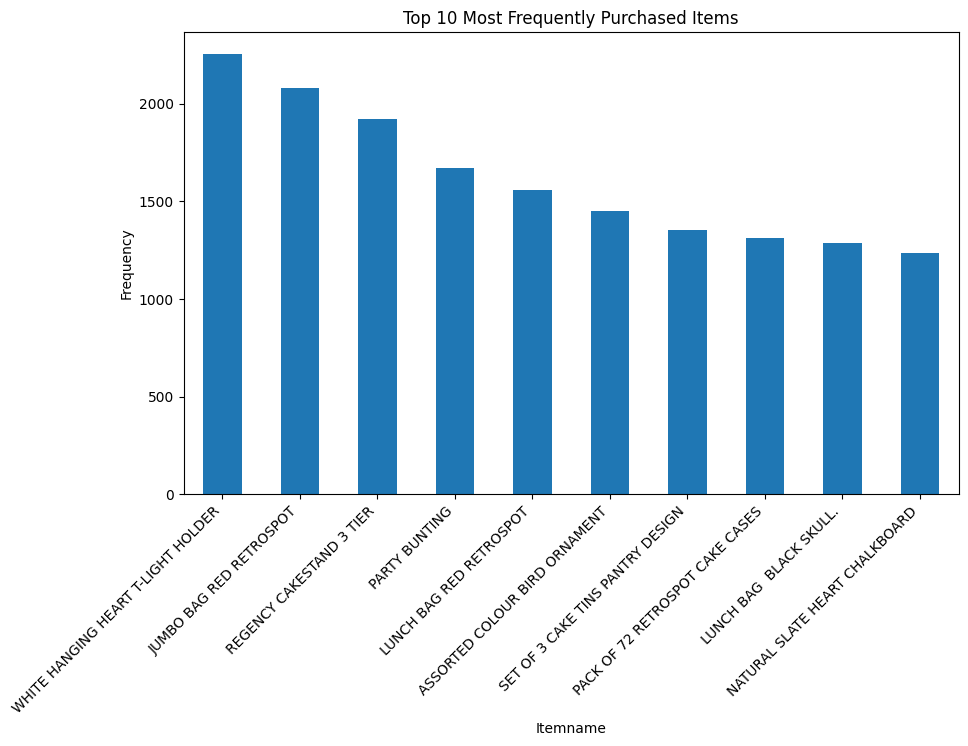

In [ ]:
# Top 10 most frequently purchased items
top_products = data['Itemname'].value_counts().head(10)
print("Top 10 most fretly purchased items:\n", top_products)

# Visualization
import matplotlib.pyplot as plt

top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Itemname')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Number of unique items per transaction
transaction_size = data.groupby('BillNo')['Itemname'].nunique()
print("Transaction size summary:\n", transaction_size.describe())

# Visualization
transaction_size.plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Number of Unique Items')
plt.ylabel('Frequency')
plt.show()

NameError: name 'data' is not defined

<ipython-input-19-a2e2110ae860>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = data.set_index('Date').resample('M')['Quantity'].sum()


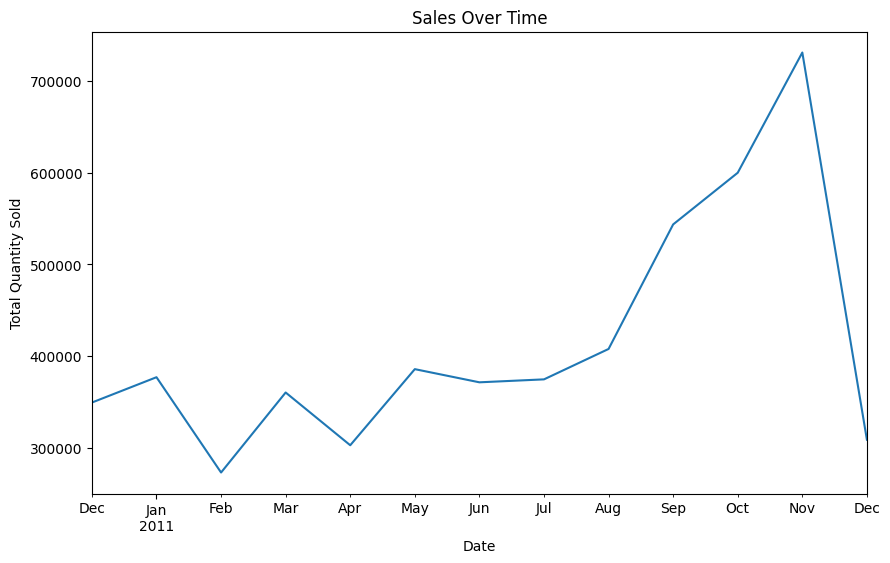

In [ ]:
# Sales trends over time
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
sales_over_time = data.set_index('Date').resample('M')['Quantity'].sum()

# Visualization
sales_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()


In [ ]:
sales_over_time.head(10)

,Quantity
Date,
2010-12-31,349426
2011-01-31,377045
2011-02-28,273125
2011-03-31,360383
2011-04-30,302863
2011-05-31,385843
2011-06-30,371487
2011-07-31,374701
2011-08-31,407850


Customer purchase frequency summary:
 count    4296.000000
mean        4.226955
std         7.082348
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: BillNo, dtype: float64


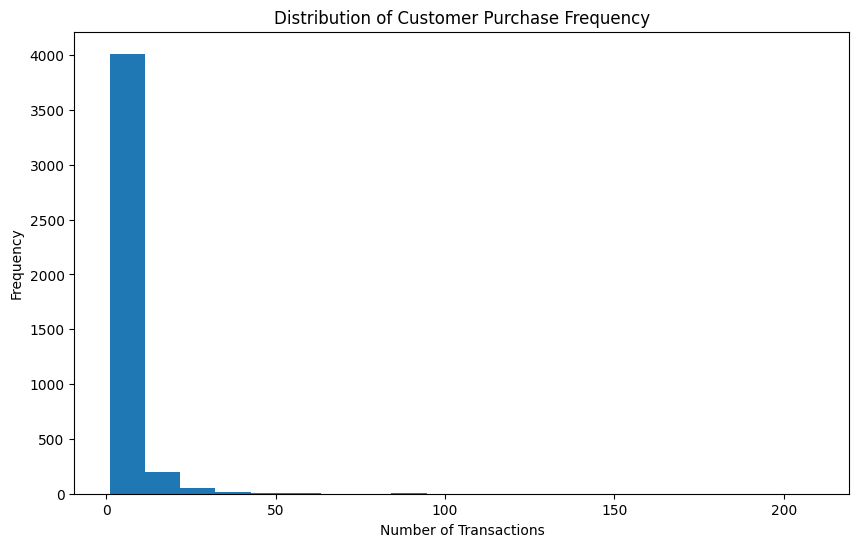

In [ ]:
# Number of transactions per customer
customer_purchases = data.groupby('CustomerID')['BillNo'].nunique()
print("Customer purchase frequency summary:\n", customer_purchases.describe())

# Visualization
customer_purchases.plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install mlxtend

In [ ]:
data['Country'].value_counts()

,count
Country,
United Kingdom,479908
Germany,9025
France,8392
Spain,2479
Netherlands,2359
Belgium,2031
Switzerland,1958
Portugal,1492
Australia,1181


In [ ]:
data1 = data[data['Country'] == 'France']
data1.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [ ]:
# Convert the dataset into the appropriate format for the Apriori algorithm
basket = data1.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Check the first few rows of the transformed dataset
basket.head(20)


<ipython-input-32-a97876b4292f>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply Apriori with a lower minimum support
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules with a lower minimum confidence
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=2)

# Display the rules
print(rules)



                                           antecedents  \
0                                            (POSTAGE)   
1                        (4 TRADITIONAL SPINNING TOPS)   
2                          (ALARM CLOCK BAKELIKE PINK)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
4                         (ALARM CLOCK BAKELIKE GREEN)   
..                                                 ...   
343  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...   
344               (SET/20 RED RETROSPOT PAPER NAPKINS)   
345                                          (POSTAGE)   
346                      (SET/6 RED SPOTTY PAPER CUPS)   
347                    (SET/6 RED SPOTTY PAPER PLATES)   

                                           consequents  antecedent support  \
0                        (4 TRADITIONAL SPINNING TOPS)            0.765306   
1                                            (POSTAGE)            0.071429   
2                         (ALARM CLOCK BAKELIKE GREEN)            0.1

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules.shape

(348, 14)

In [ ]:
rules

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(POSTAGE),(4 TRADITIONAL SPINNING TOPS),0.765306,0.071429,0.056122,0.073333,1.026667,1.0,0.001458,1.002055,0.110672,0.071895,0.002051,0.429524
1,(4 TRADITIONAL SPINNING TOPS),(POSTAGE),0.071429,0.765306,0.056122,0.785714,1.026667,1.0,0.001458,1.095238,0.027972,0.071895,0.086957,0.429524
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859,0.964734,0.591837,0.695480,0.744079
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383,0.959283,0.591837,0.736244,0.744079
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...","(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE)",0.122449,0.109694,0.081633,0.666667,6.077519,1.0,0.068201,2.670918,0.952035,0.542373,0.625597,0.705426
344,(SET/20 RED RETROSPOT PAPER NAPKINS),"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET/6 R...",0.132653,0.102041,0.081633,0.615385,6.030769,1.0,0.068097,2.334694,0.961765,0.533333,0.571678,0.707692
345,(POSTAGE),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.765306,0.099490,0.081633,0.106667,1.072137,1.0,0.005493,1.008034,0.286685,0.104235,0.007970,0.463590
346,(SET/6 RED SPOTTY PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",0.137755,0.084184,0.081633,0.592593,7.039282,1.0,0.070036,2.247913,0.995007,0.581818,0.555143,0.781145


In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(348, 14)

In [ ]:
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
24,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,1.0,0.058856,8.690476,0.993846,0.833333,0.884932,0.909392
25,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,1.0,0.058856,12.535714,0.991123,0.833333,0.920228,0.909392
86,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.063776,0.056122,0.051020,0.800000,14.254545,1.0,0.047441,4.719388,0.993188,0.740741,0.788108,0.854545
87,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,1.0,0.047441,10.298469,0.985135,0.740741,0.902898,0.854545
173,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735,0.956140,0.645161,0.769412,0.784615
174,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041,0.993343,0.857143,0.872645,0.924444
175,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122,0.981725,0.857143,0.953609,0.924444
176,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED),0.073980,0.094388,0.063776,0.862069,9.133271,1.0,0.056793,6.565689,0.961653,0.609756,0.847693,0.768872


In [ ]:
filtered_rules = rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

In [ ]:
rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(348, 14)

In [ ]:
!pip install flask-ngrok
!ngrok authtoken 'your_auth_token'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: blinker
    Found existing installation: blinker 1.4
error: uninstall-distutils-installed-package

× Cannot uninstall blinker 1.4
╰─> It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
/bin/bash: line 1: ngrok: command not found


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/recommend', methods=['POST'])
def recommend():
    customer_basket = request.form.getlist('items')  # Get selected items from the form
    recommendations = get_recommendations(customer_basket, rules)
    return render_template('recommendations.html', recommendations=recommendations)

def get_recommendations(customer_basket, rules):
        recommendations = []
        for item in customer_basket:
            for index, row in rules.iterrows():
                if item in list(row['antecedents']):  # Check if item in customer basket is an antecedent in a rule
                    recommendations.extend(list(row['consequents']))  # Add consequents to recommendations
        recommendations = list(set(recommendations))  # Remove duplicates
        return recommendations
if __name__ == '__main__':
    app.run()

ModuleNotFoundError: No module named 'flask'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
customer_basket = ["ALARM CLOCK BAKELIKE GREEN"]
print(get_recommendations(customer_basket, rules))

['ALARM CLOCK BAKELIKE RED', 'ALARM CLOCK BAKELIKE PINK', 'POSTAGE']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
